### Experiment2

PID Gain 값
- Ki=0.5
- Kp=15
- Kd=0.5

가속 시간
- Ta_2 = 0.25s

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data2 = pd.read_csv("Experiment2.csv")

In [3]:
data2

,TIME,Target Y,Actual Y,Following Error
0,0.0000,0.0,0.0,0.0
1,0.0001,0.0,0.0,0.0
2,0.0002,0.0,0.0,0.0
3,0.0003,0.0,0.0,0.0
4,0.0004,0.0,0.0,0.0
...,...,...,...,...
221056,NaN,NaN,NaN,NaN
221057,NaN,NaN,NaN,NaN
221058,NaN,NaN,NaN,NaN
221059,NaN,NaN,NaN,NaN


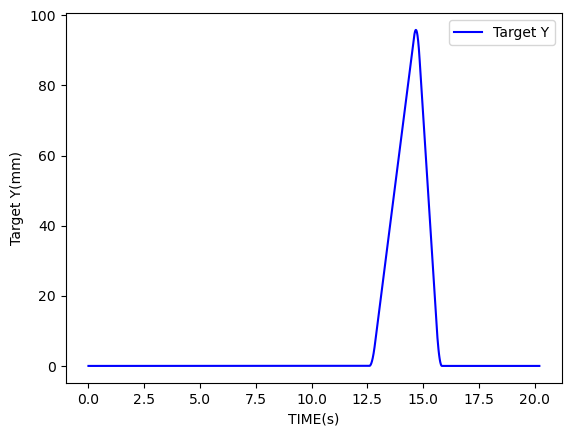

In [5]:
x = data2["TIME"]
y1 = data2["Target Y"]

plt.plot(x, y1, 'b', label = "Target Y")
plt.xlabel("TIME(s)")
plt.ylabel("Target Y(mm)")
plt.legend(loc="best")
plt.show()

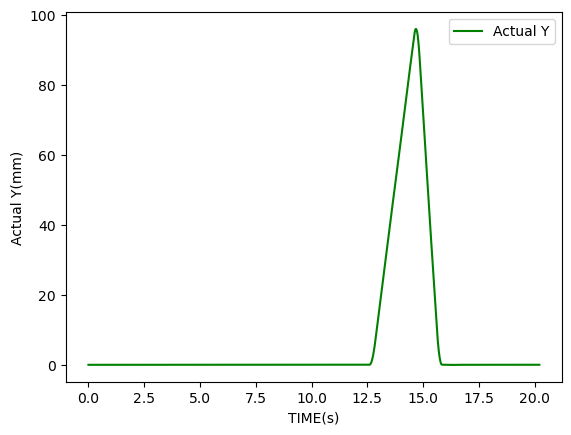

In [6]:
y2 = data2["Actual Y"]
plt.plot(x, y2, 'g', label = "Actual Y")
plt.xlabel("TIME(s)")
plt.ylabel("Actual Y(mm)")
plt.legend(loc="best")
plt.show()

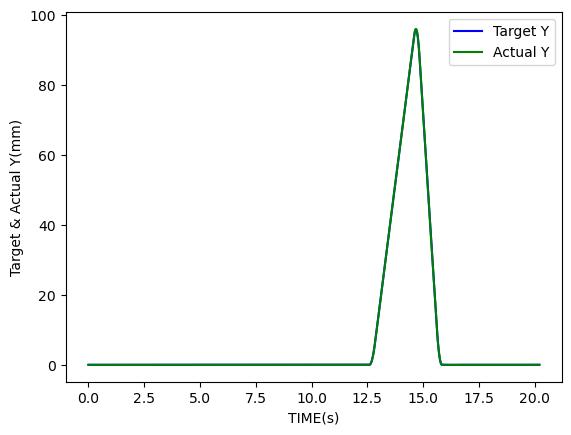

In [8]:
plt.plot(x, y1, 'b', label = "Target Y")
plt.plot(x, y2, 'g', label = "Actual Y")
plt.xlabel("TIME(s)")
plt.ylabel("Target & Actual Y(mm)")
plt.legend(loc="best")
plt.show()

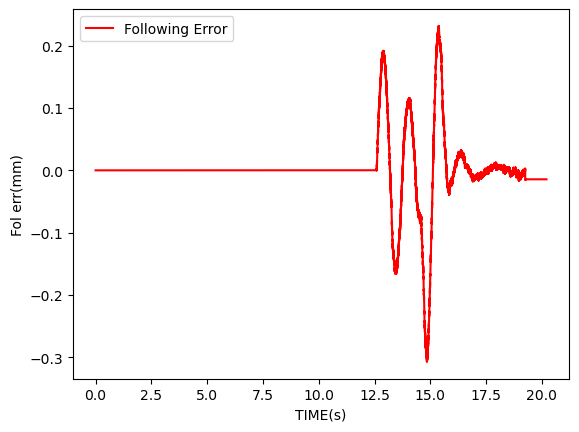

In [9]:
y3 = data2["Following Error"]
plt.plot(x, y3, 'r', label = "Following Error")
plt.xlabel("TIME(s)")
plt.ylabel("Fol err(mm)")
plt.legend(loc="best")
plt.show()

# 분석 

In [10]:
print("목표 변위의 최댓값: ", max(y1),"mm")
print("실제 변위의 최댓값: ", max(y2), "mm")

목표 변위의 최댓값:  95.833334 mm
실제 변위의 최댓값:  95.9881 mm


### 목표 변위가 0이고 시간이 15초 보다 작을 때

In [11]:
data2[(data2["Target Y"]==0) & (data2["TIME"]<15)]

,TIME,Target Y,Actual Y,Following Error
0,0.000000,0.0,0.0,0.0
1,0.000100,0.0,0.0,0.0
2,0.000200,0.0,0.0,0.0
3,0.000300,0.0,0.0,0.0
4,0.000400,0.0,0.0,0.0
...,...,...,...,...
125879,12.588128,0.0,0.0,0.0
125880,12.588228,0.0,0.0,0.0
125881,12.588328,0.0,0.0,0.0
125882,12.588428,0.0,0.0,0.0


### => 12.5885초 이후에 이송 시작

---

### 목표 변위가 대략 0이고 시간이 15초 보다 클 때

In [12]:
data2[(data2["Target Y"]>=0) & (data2["TIME"]>15)]

,TIME,Target Y,Actual Y,Following Error
149998,15.000032,71.345000,71.5144,-0.169400
149999,15.000132,71.335000,71.5044,-0.169400
150000,15.000232,71.325000,71.4942,-0.169200
150001,15.000332,71.315000,71.4839,-0.168900
150002,15.000432,71.305000,71.4735,-0.168500
...,...,...,...,...
158377,15.837988,0.000060,0.0382,-0.038140
158378,15.838088,0.000040,0.0377,-0.037660
158379,15.838188,0.000024,0.0372,-0.037176
158380,15.838289,0.000012,0.0367,-0.036688


### => 약 15.8384s 에 목표변위가 0이라고 할 수 있다.

---

### 15.8384초 이후에, 그러니까 모터가 원위치에 도착한 후에도  모터가 진동한다. 
### 그래서 추종오차가 지속적으로 변화하다가 수렴한다. 

### 수렴한 추종 오차 값(Steady state error)는 대략 -0.01mm이다.